In [1]:
# Importing Necessary Libraries
import numpy 
import google
import matplotlib
import sklearn
import tensorflow
import cv2
import PIL
import pandas

In [2]:
# Kaggle API Authentication
!pip install -q kaggle
google.colab.files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
# Downloading and Unzipping The Dataset
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign
!unzip -q skin-cancer-malignant-vs-benign.zip

100% 325M/325M [00:03<00:00, 89.6MB/s]



In [4]:
training_image_generator = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    vertical_flip = True,
    horizontal_flip = True,
    rotation_range = 40)

In [5]:
training_data = training_image_generator.flow_from_directory(directory = "/content/data/train", target_size = (28, 28))

Found 2637 images belonging to 2 classes.


In [6]:
testing_image_generator = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [7]:
testing_data = testing_image_generator.flow_from_directory(directory = "/content/data/test", target_size = (28, 28))

Found 660 images belonging to 2 classes.


In [11]:
model = tensorflow.keras.models.Sequential([
        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(units = 512, activation = "relu", input_shape = (28, 28, 3)),
        tensorflow.keras.layers.Dense(units = 512, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 512, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 512, activation = "relu"),
        tensorflow.keras.layers.Dense(units = 2, activation = "sigmoid")

])

In [12]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [13]:
model.fit(training_data, epochs = 10)

Epoch 1/10
83/83 [==============================] - 6s 66ms/step - loss: 0.8155 - accuracy: 0.5409
Epoch 2/10
83/83 [==============================] - 5s 66ms/step - loss: 0.6243 - accuracy: 0.6570
Epoch 3/10
83/83 [==============================] - 5s 66ms/step - loss: 0.5775 - accuracy: 0.6825
Epoch 4/10
83/83 [==============================] - 5s 66ms/step - loss: 0.5715 - accuracy: 0.6986
Epoch 5/10
83/83 [==============================] - 5s 66ms/step - loss: 0.5405 - accuracy: 0.7202
Epoch 6/10
83/83 [==============================] - 5s 66ms/step - loss: 0.5325 - accuracy: 0.7366
Epoch 7/10
83/83 [==============================] - 6s 68ms/step - loss: 0.5175 - accuracy: 0.7404
Epoch 8/10
83/83 [==============================] - 6s 68ms/step - loss: 0.5329 - accuracy: 0.7112
Epoch 9/10
83/83 [==============================] - 6s 67ms/step - loss: 0.5042 - accuracy: 0.7547
Epoch 10/10
83/83 [==============================] - 5s 66ms/step - loss: 0.4892 - accuracy: 0.7516


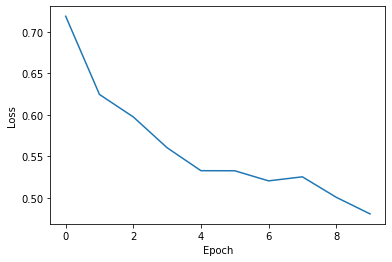

In [14]:
# Visualizing The Optimization
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(model.history.epoch, model.history.history["loss"])
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.show()

In [15]:
# Examining The Testing Accuracy
print("Testing Accuracy: {}%".format(((model.evaluate(testing_data)[1] * 100))))

21/21 [==============================] - 1s 53ms/step - loss: 0.4385 - accuracy: 0.7758
Testing Accuracy: 77.57575511932373%


In [16]:
# Visualizing a Random Prediction
def visualize_prediction(file_path, actual): 
  matplotlib.pyplot.figure()
  image = cv2.imread(file_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  matplotlib.pyplot.imshow(image)
  image = cv2.resize(image, dsize=(28, 28))
  image = image / 255.0
  image = numpy.resize(image, (1, 28, 28, 3))
  prediction = model.predict(image)
  classes = {0: "Benign",
             1: "Malignant"}
  prediction = classes[prediction.argmax()]
  matplotlib.pyplot.xticks([])
  matplotlib.pyplot.xlabel("Prediction: {}\nActual: {}".format(prediction, actual))
  matplotlib.pyplot.yticks([])
  matplotlib.pyplot.show()

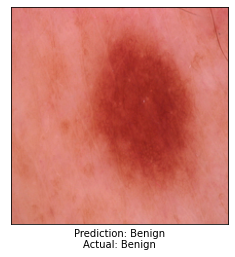

In [17]:
visualize_prediction(file_path = "/content/train/benign/1295.jpg", actual = "Benign")

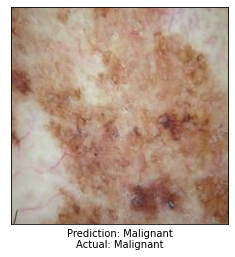

In [18]:
visualize_prediction(file_path = "/content/test/malignant/195.jpg", actual = "Malignant")